In [ ]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer_Churn_.csv")
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
# Checking for missing values in the DataFrame
missing_values = df.isna().sum()

# Displaying the count of missing values for each column
print(missing_values)

Call Failure               0
Complains                  0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


In [ ]:
#rename columns
df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "subs_len", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "total_sec_calls", "Frequency of use": "total_num_calls", "Frequency of SMS": "total_num_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})


In [ ]:
df

,Call Failure,complains,Subscription Length,Charge Amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,age_group,tariff_plan,status,age,customer_value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
#see how many unique values for each col
df.nunique()

Call Failure             37
complains                 2
Subscription Length      45
Charge Amount            11
total_sec_calls        1756
total_num_calls         242
total_num_sms           405
distinct_call_nums       92
age_group                 5
tariff_plan               2
status                    2
age                       5
customer_value         2654
Churn                     2
dtype: int64

In [ ]:
#there is no Nan values
df.isnull().sum()

Call Failure           0
complains              0
Subscription Length    0
Charge Amount          0
total_sec_calls        0
total_num_calls        0
total_num_sms          0
distinct_call_nums     0
age_group              0
tariff_plan            0
status                 0
age                    0
customer_value         0
Churn                  0
dtype: int64

# **EDA**

In [ ]:
# Select the columns for analysis
numeric_columns = ['Call Failure', 'complains', 'Subscription Length', 'Charge Amount', 'total_sec_calls',
                   'total_num_calls', 'total_num_sms', 'distinct_call_nums', 'age_group', 'customer_value']
for column in numeric_columns:
    data = df[column]
    skewness = np.mean((data - np.mean(data))**3) / np.power(np.var(data), 1.5)
    kurtosis = np.mean((data - np.mean(data))**4) / np.power(np.var(data), 2)
    print(f"Column: {column}")
    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")
    print("-------------")

Column: Call Failure
Skewness: 1.0892
Kurtosis: 3.9035
-------------
Column: complains
Skewness: 3.1864
Kurtosis: 11.1534
-------------
Column: Subscription Length
Skewness: -1.2994
Kurtosis: 4.2120
-------------
Column: Charge Amount
Skewness: 2.5836
Kurtosis: 11.8384
-------------
Column: total_sec_calls
Skewness: 1.3213
Kurtosis: 3.9902
-------------
Column: total_num_calls
Skewness: 1.1436
Kurtosis: 3.8169
-------------
Column: total_num_sms
Skewness: 1.9732
Kurtosis: 6.2515
-------------
Column: distinct_call_nums
Skewness: 1.0289
Kurtosis: 4.3559
-------------
Column: age_group
Skewness: 0.4734
Kurtosis: 3.2029
-------------
Column: customer_value
Skewness: 1.4266
Kurtosis: 4.2206
-------------


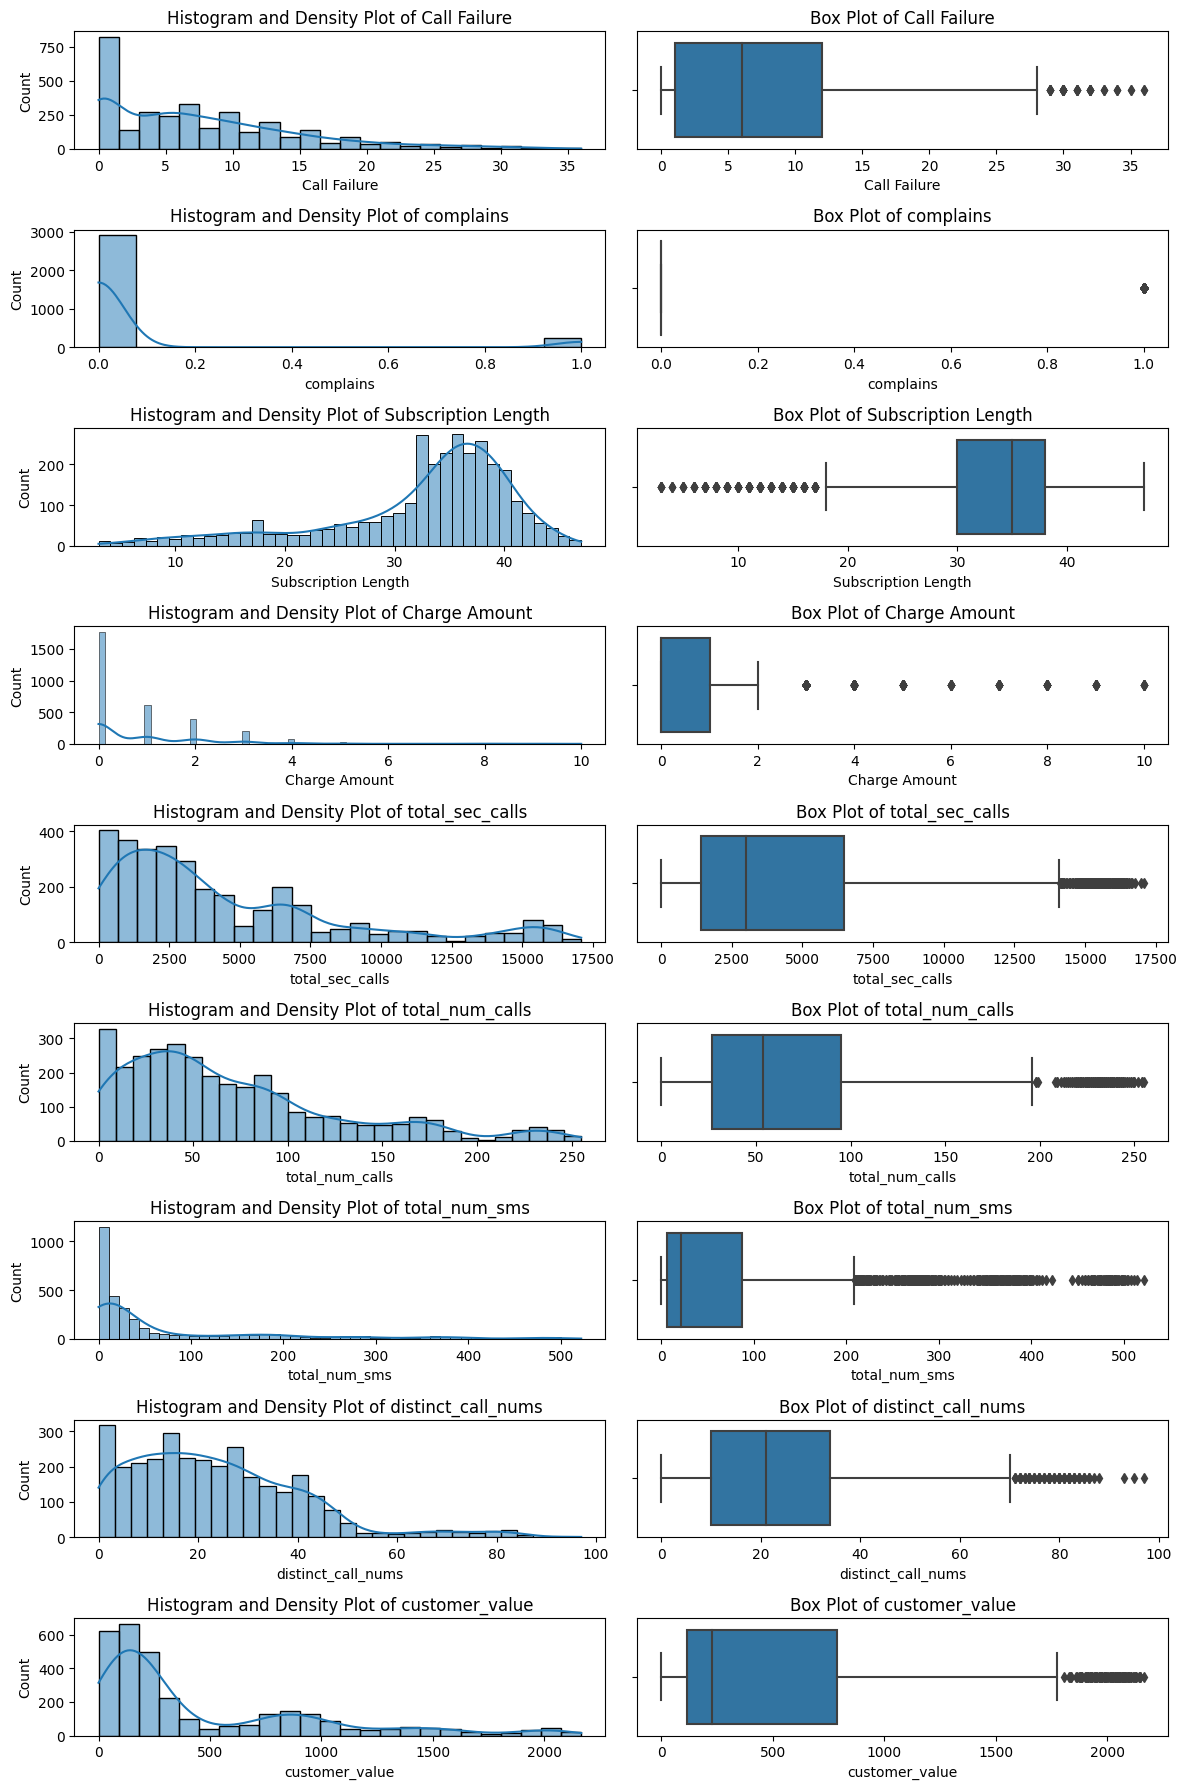

In [ ]:
numeric_columns = ['Call Failure', 'complains', 'Subscription Length', 'Charge Amount', 'total_sec_calls',
                   'total_num_calls', 'total_num_sms', 'distinct_call_nums', 'customer_value']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 18))
plt.subplots_adjust(hspace=0.5)

# Loop through each numeric column and create skewness and kurtosis plots
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram and Density Plot of {column}')

    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


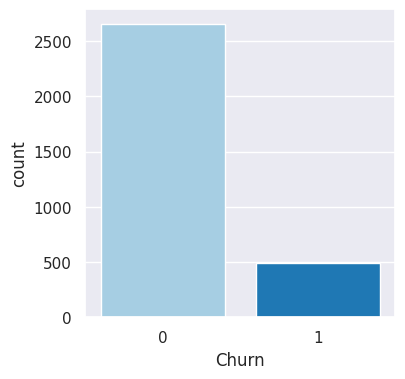

In [ ]:
#see target class is imbalanced

sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x="Churn", data=df, palette=sns.color_palette("Paired", 7), saturation=10);

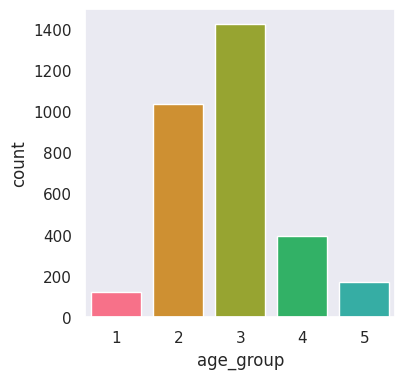

In [ ]:
sns.set_style("dark")
sns.countplot(x="age_group", data=df, palette=sns.color_palette("husl", 8), saturation=10);

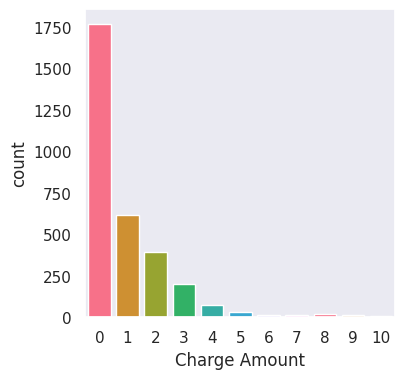

In [ ]:
sns.set_style("dark")
sns.countplot(x="Charge Amount", data=df, palette=sns.color_palette("husl", 8), saturation=10);

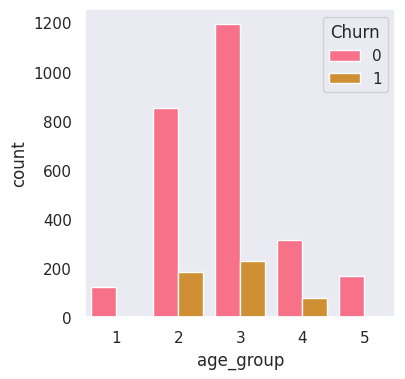

In [ ]:
sns.set_style("dark")
sns.countplot(x="age_group", data=df, palette=sns.color_palette("husl", 8), saturation=10, hue="Churn");

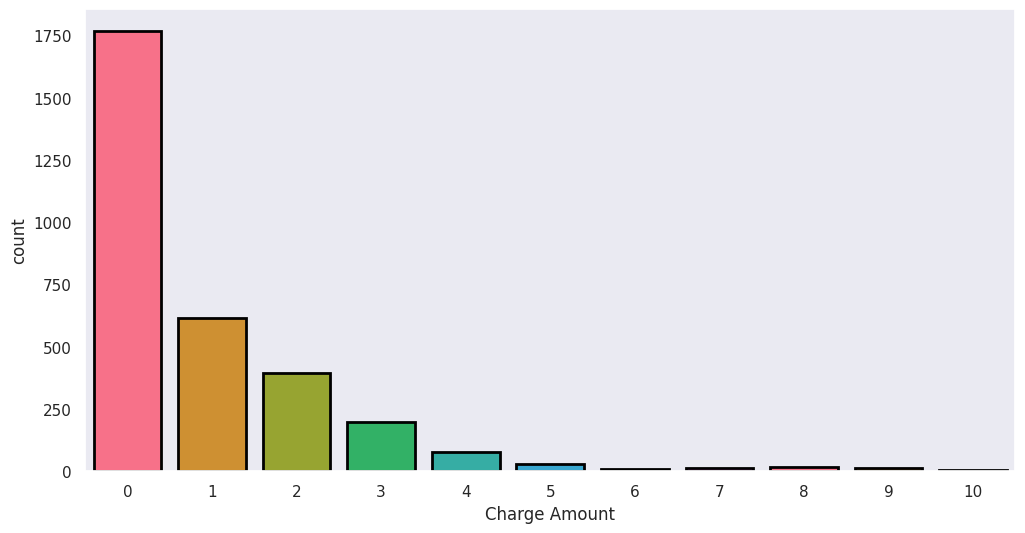

In [ ]:
sns.set(rc={"font.style":"normal",
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(12.0, 6),
            'xtick.labelsize':25,
            'ytick.labelsize':20})

sns.set(style="white",font_scale=1)


sns.set_style("dark")
sns.countplot(x="Charge Amount", data=df, palette=sns.color_palette("husl", 8),
              saturation=10, edgecolor=(0,0,0), linewidth=2);

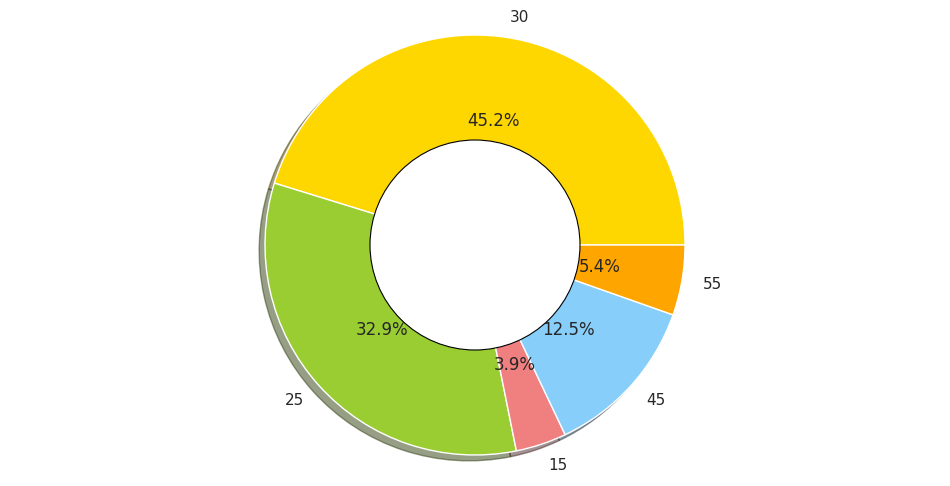

In [ ]:
# create data
names = list(df["age"].unique())
sizes = [df["age"].value_counts()[unique_class] * 100 / len(df["age"]) for unique_class in names]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']  # You can choose different colors here
explode = (0, 0, 0, 0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=names, colors=colors,
        autopct='%1.1f%%', shadow=True)

# draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.50, color='black', fc='white', linewidth=0.80)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that the pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [ ]:
cat_feature_col=["complains", "Charge Amount", "tariff_plan", "status", "age","Churn"]
for i in cat_feature_col:
    print(f"{i} : {df[i].unique()}")
    print(df[i].value_counts())
    print("-------------------------------------------")

complains : [0 1]
0    2909
1     241
Name: complains, dtype: int64
-------------------------------------------
Charge Amount : [ 0  1  2  3  8  4  9  7  5 10  6]
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: Charge Amount, dtype: int64
-------------------------------------------
tariff_plan : [1 2]
1    2905
2     245
Name: tariff_plan, dtype: int64
-------------------------------------------
status : [1 2]
1    2368
2     782
Name: status, dtype: int64
-------------------------------------------
age : [30 25 15 45 55]
30    1425
25    1037
45     395
55     170
15     123
Name: age, dtype: int64
-------------------------------------------
Churn : [0 1]
0    2655
1     495
Name: Churn, dtype: int64
-------------------------------------------


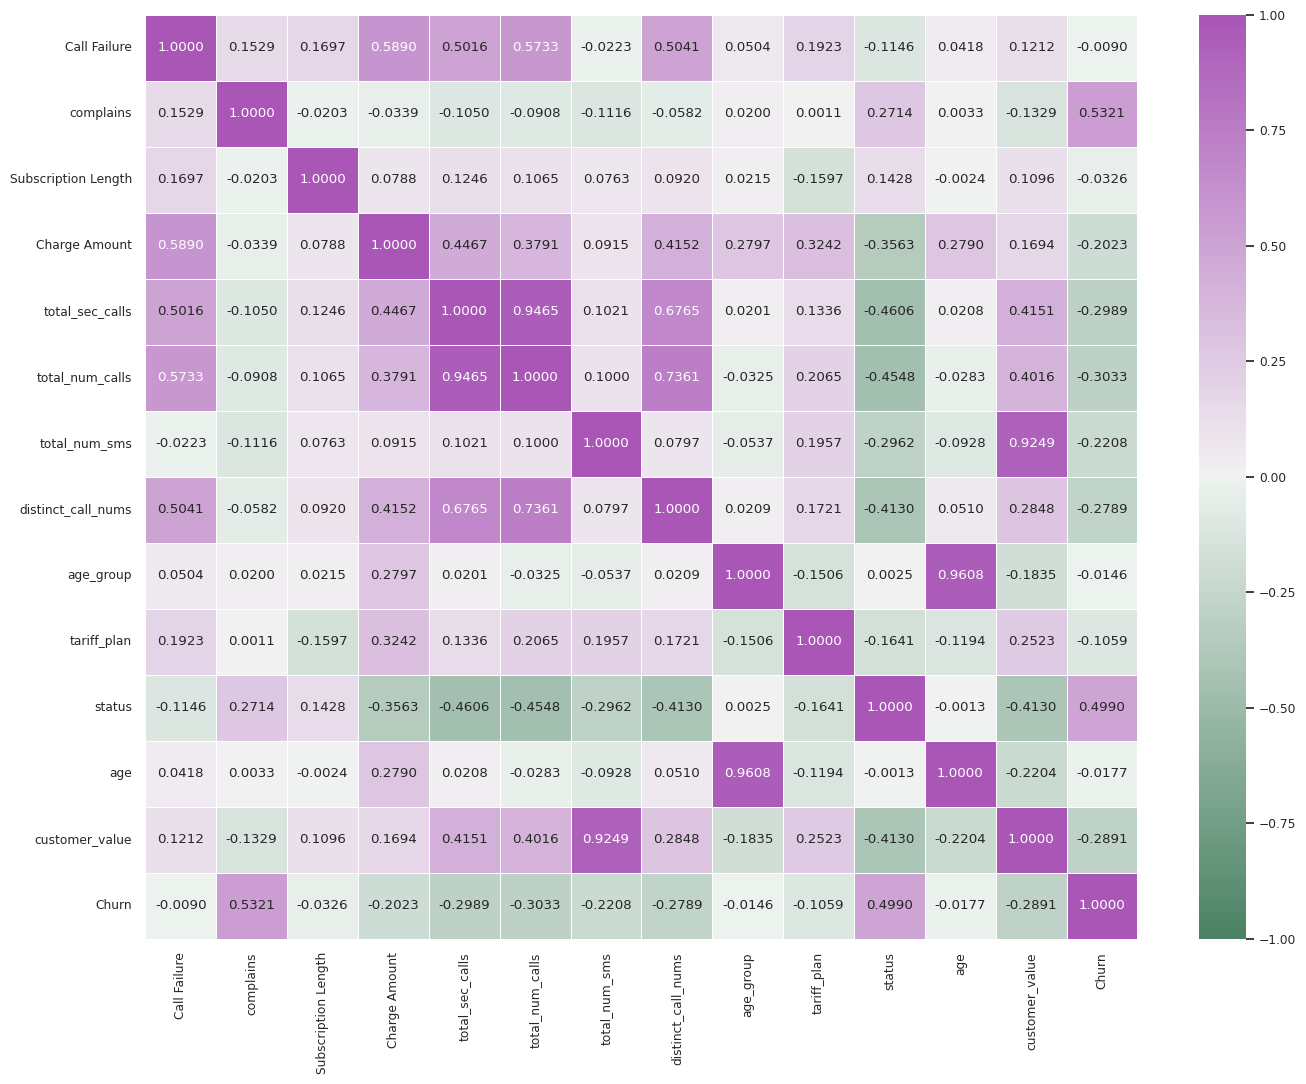

In [ ]:
#heatmap for correlation coefficient

# calculate correlation
df_corr = df.corr()

# correlation matrix
sns.set(font_scale=0.8)
plt.figure(figsize=(16,12))
sns.heatmap(df_corr, annot=True, fmt=".4f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True))

#plt.yticks(rotation=0)
plt.show();

<Axes: title={'center': 'Churn vs all features'}>

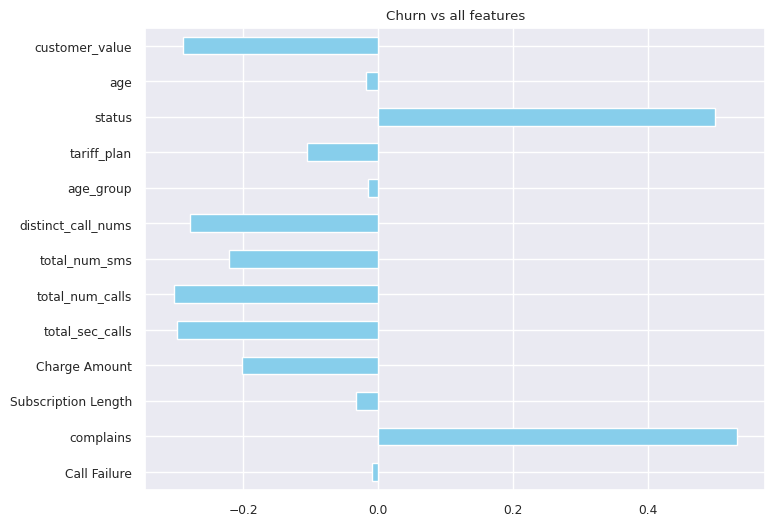

In [ ]:
#feature importance using corr
df.drop('Churn', axis=1).corrwith(df.Churn).plot(kind='barh', figsize=(8, 6), color='skyblue', title="Churn vs all features")

In [ ]:
!pip install ppscore;

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=68b286b4e81fc8014d7c8fe6c5dcb9b04318d4516596e0d534153ca420662547
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


<Axes: xlabel='x', ylabel='y'>

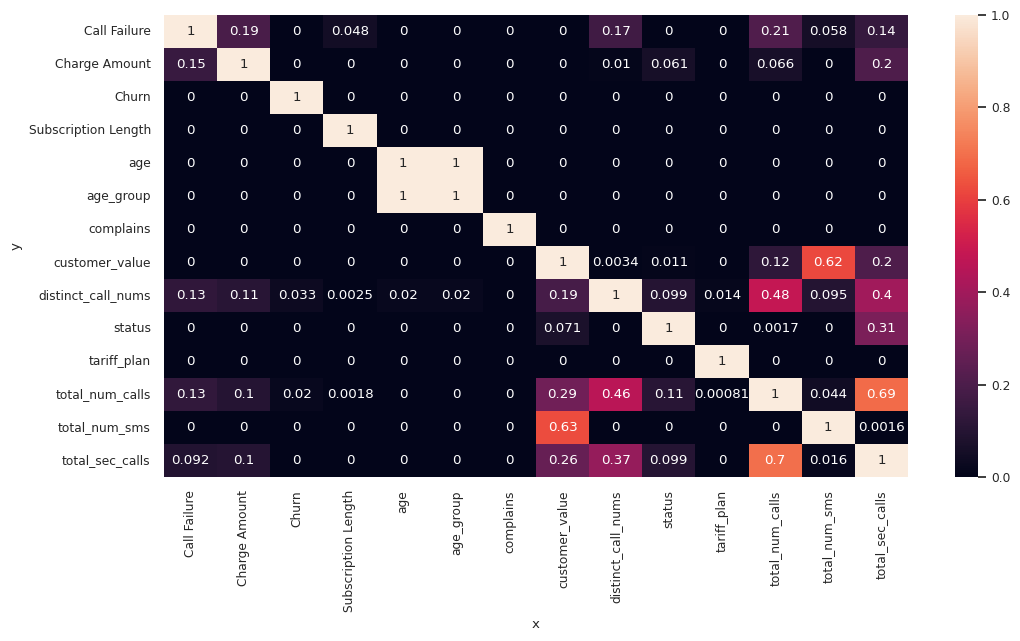

In [ ]:
import seaborn as sns
import ppscore as pps

matrix_df = pps.matrix(df).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

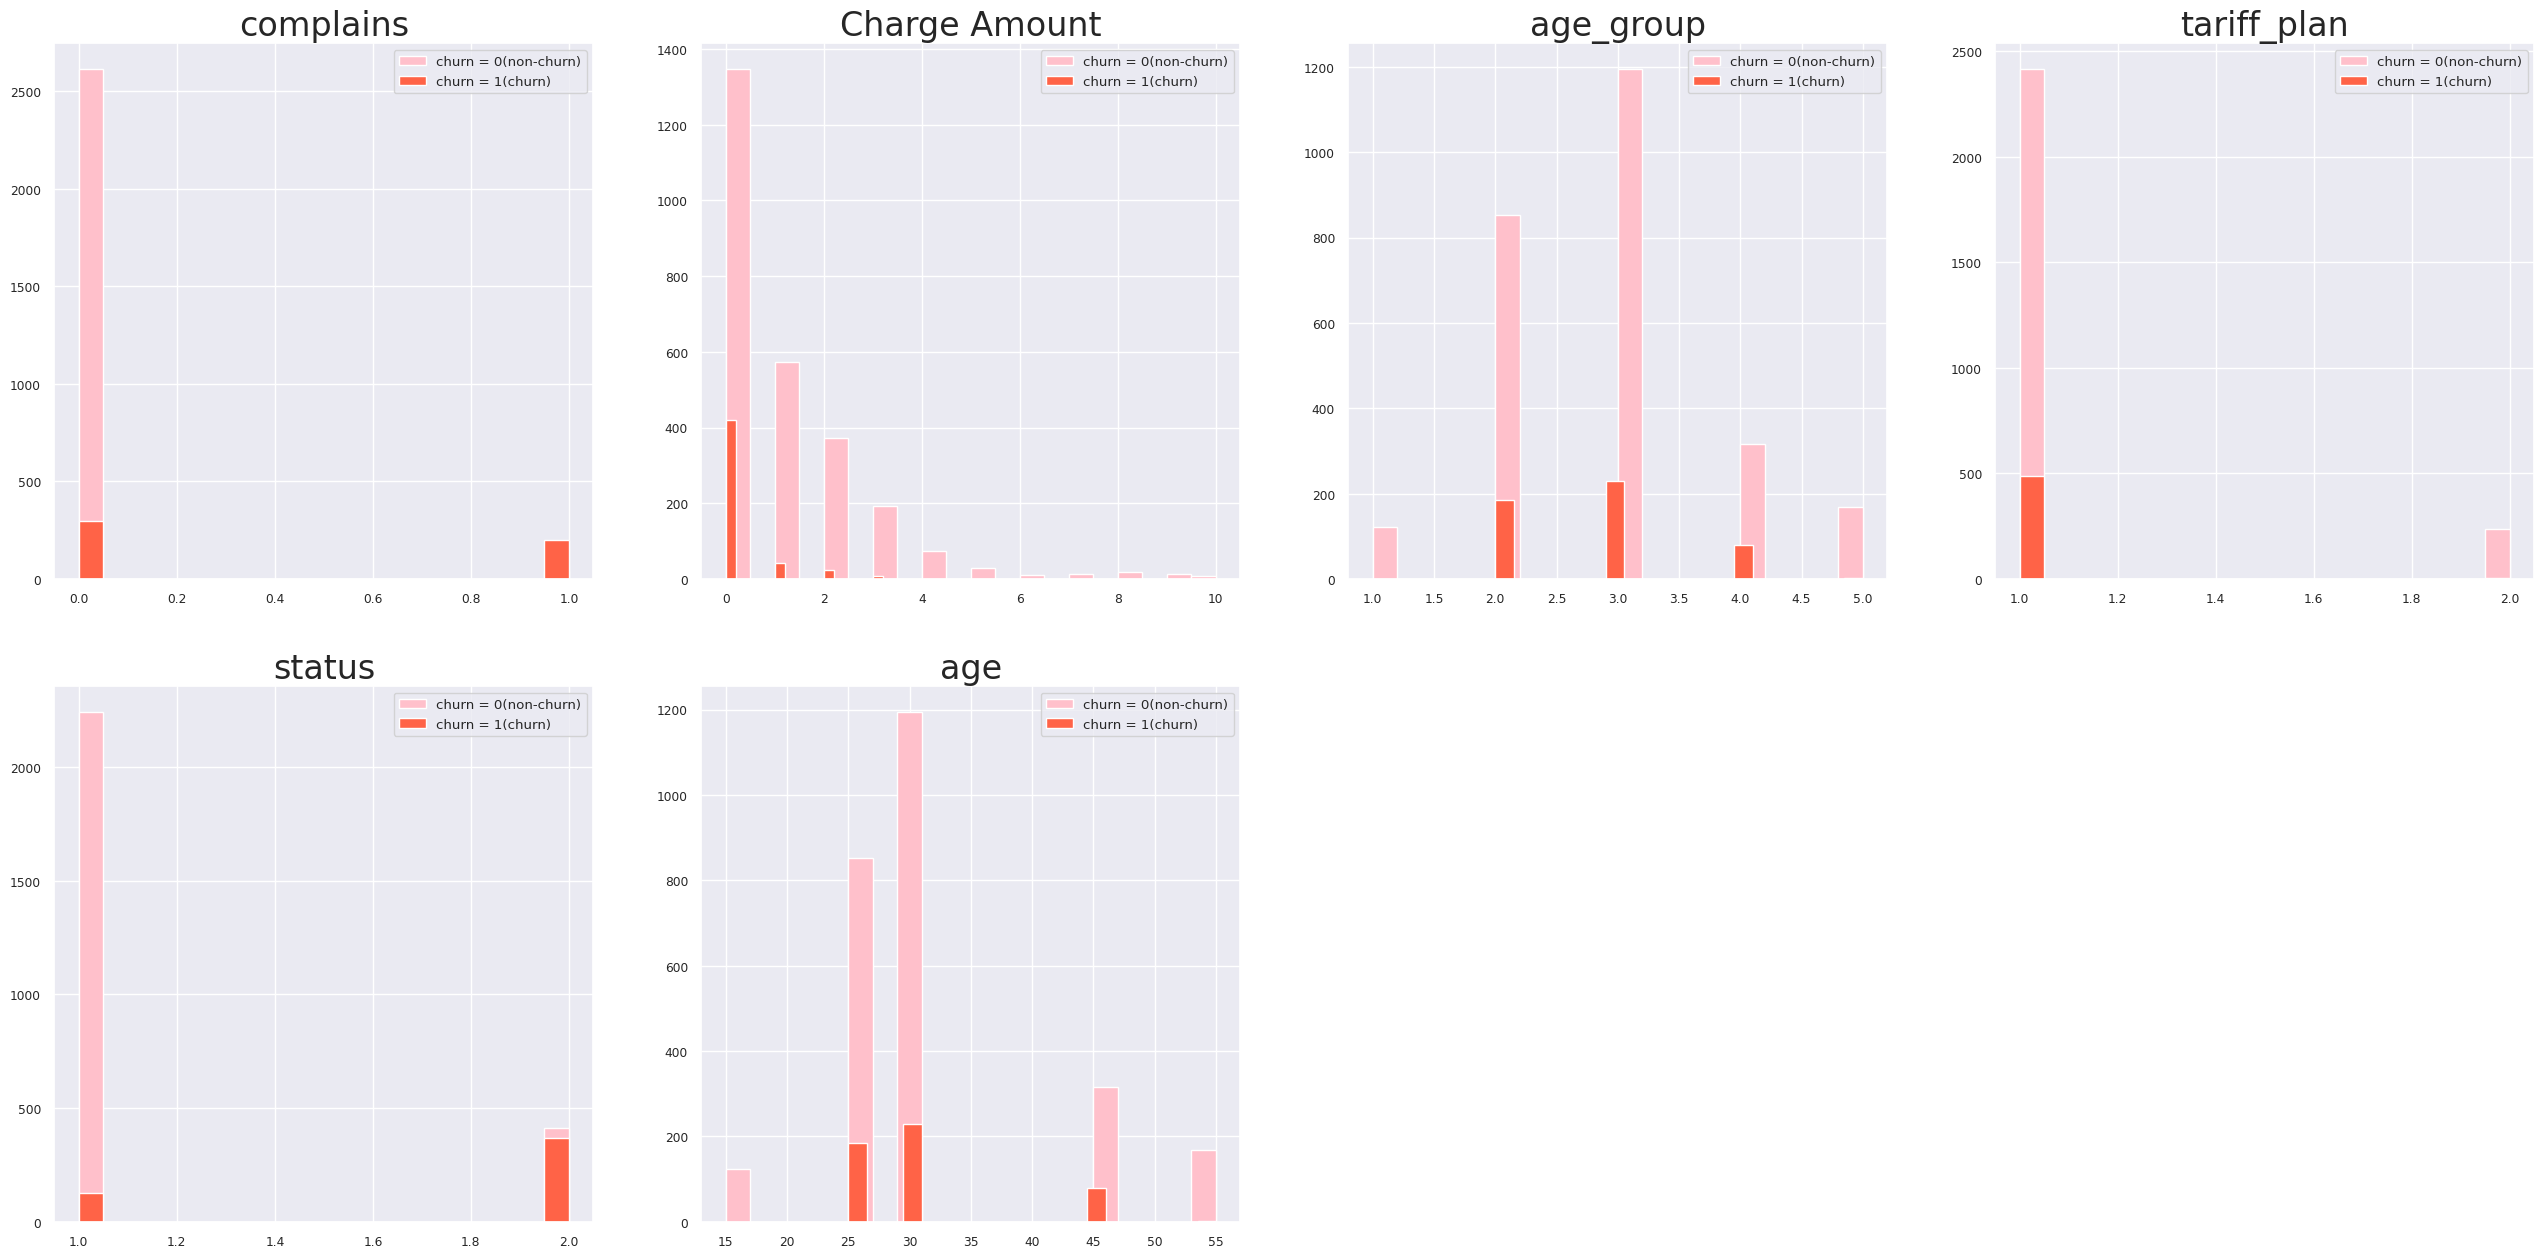

In [ ]:
#for cat data distribution
import matplotlib

plt.figure(figsize=(32, 32))
matplotlib.rc('axes', titlesize=24)#cols size

cat_feature_col=["complains", "Charge Amount", "age_group", "tariff_plan", "status", "age"]
for i, column in enumerate(cat_feature_col, 1):
    plt.subplot(4, 4, i)
    df[df["Churn"] == 0][column].hist(bins=20, color='pink', label='churn = 0(non-churn)', alpha=1)
    df[df["Churn"] == 1][column].hist(bins=20, color='tomato', label='churn = 1(churn)', alpha=1)
    plt.legend(fontsize='medium')
    plt.title(column)

In [ ]:
#since age_group and age is highly correlated, we decide to del age_group
df=df.drop(columns=["age_group"])

In [ ]:
df

,Call Failure,complains,Subscription Length,Charge Amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,tariff_plan,status,age,customer_value,Churn
0,8,0,38,0,4370,71,5,17,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,1,1,30,1077.640,0


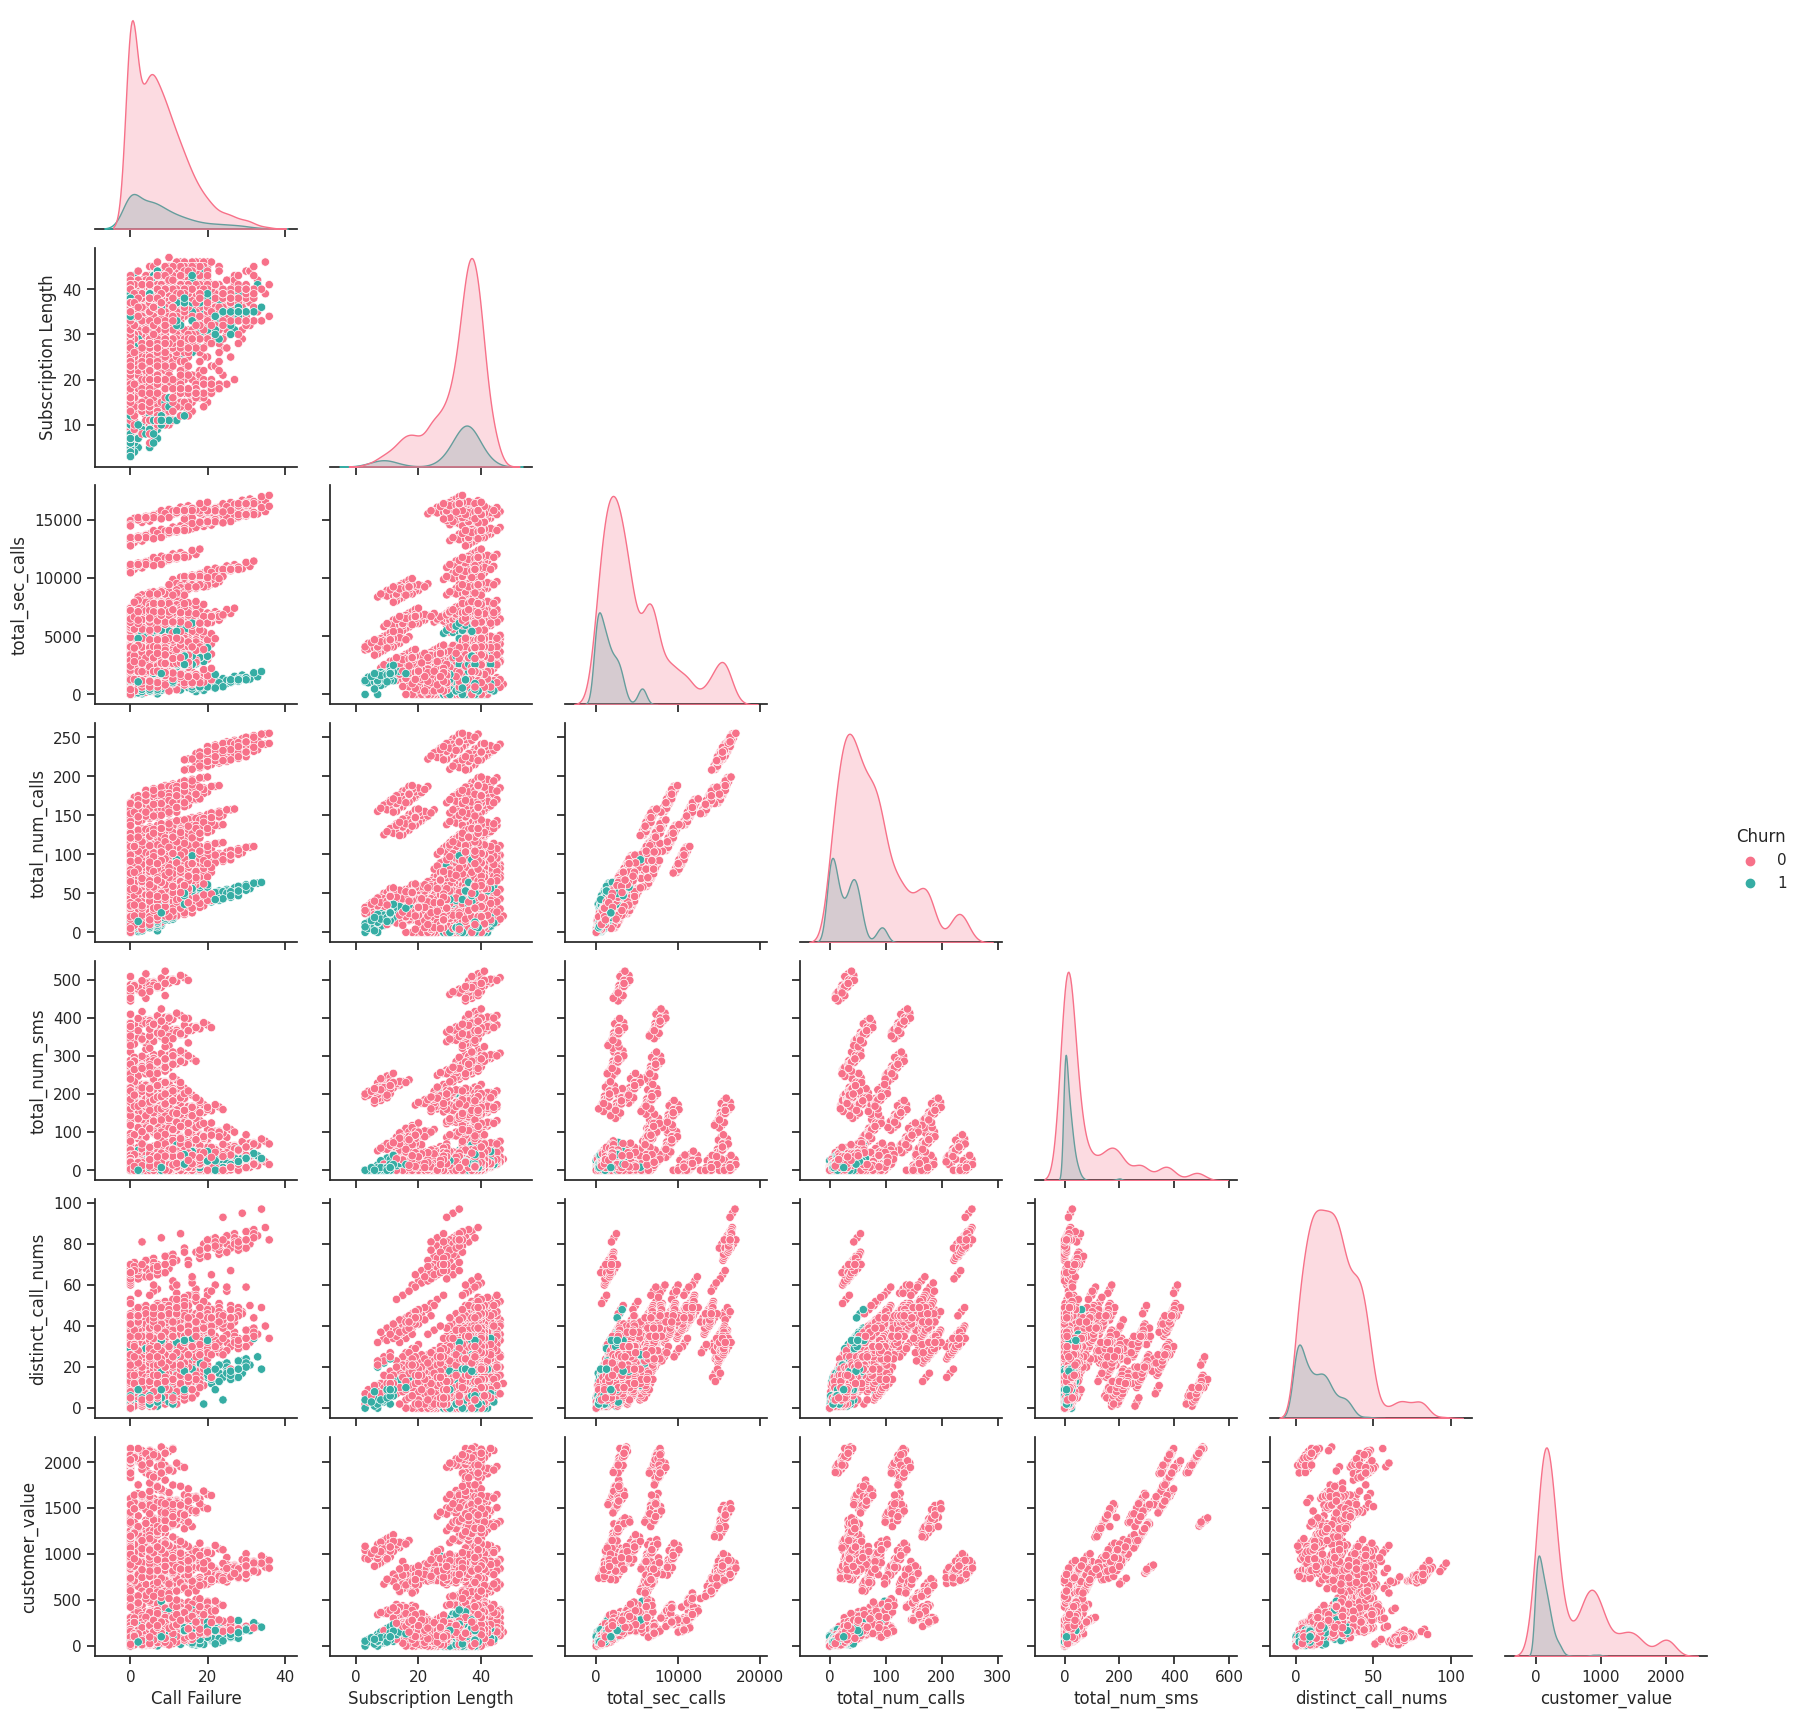

In [ ]:
#for cont data scatterplot matrix
cont_feature_col=["Call Failure", "Subscription Length", "total_sec_calls", "total_num_calls", "total_num_sms", "distinct_call_nums","customer_value"]

sns.set(style="ticks")

sns.pairplot(df[cont_feature_col + ['Churn']], hue='Churn', palette="husl", corner=True)

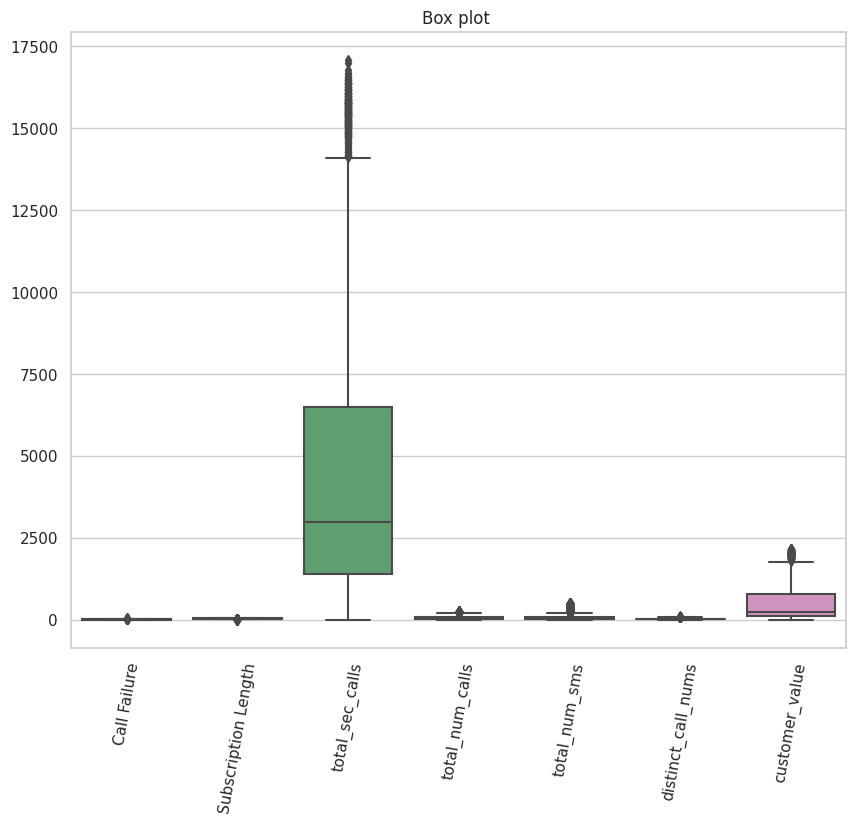

In [ ]:
#outlier analysis using box-plot(continuos data can have outliers)

sns.set(style="whitegrid",font_scale=1)
plt.figure(figsize=(10,8))
sns.boxplot(data=df[cont_feature_col])
plt.xticks(rotation=80)
plt.title("Box plot ")
plt.show()

In [ ]:
df.describe()

,Call Failure,complains,Subscription Length,Charge Amount,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,tariff_plan,status,age,customer_value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [ ]:
# find the IQR
q1 = df[cont_feature_col].quantile(.25)
q3 = df[cont_feature_col].quantile(.75)
IQR = q3-q1

outliers_df = np.logical_or((df[cont_feature_col] < (q1 - 1.5 * IQR)), (df[cont_feature_col] > (q3 + 1.5 * IQR)))

outlier_list=[]
total_outlier=[]
for col in list(outliers_df.columns):
    try:
        total_outlier.append(outliers_df[col].value_counts()[True])
        outlier_list.append((outliers_df[col].value_counts()[True] / outliers_df[col].value_counts().sum()) * 100)
    except:
        outlier_list.append(0)
        total_outlier.append(0)

outlier_list

outlier_df=pd.DataFrame(zip(list(outliers_df.columns), total_outlier, outlier_list), columns=['name of the column', 'total', 'outlier(%)'])

#see totally how many outliers in cont features
outlier_df.set_index('name of the column', inplace=True)
#del outlier_df.index.name
outlier_df

,total,outlier(%)
name of the column,,
Call Failure,47,1.492063
Subscription Length,282,8.952381
total_sec_calls,200,6.349206
total_num_calls,129,4.095238
total_num_sms,368,11.682540
distinct_call_nums,77,2.444444
customer_value,116,3.682540


In [ ]:
outliers_df

,Call Failure,Subscription Length,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3145,False,False,False,False,False,False,False
3146,False,True,False,False,False,False,False
3147,False,False,False,False,False,False,False
3148,False,True,False,False,True,False,False


In [ ]:
df_cont=df[cont_feature_col]
out_nan_df=df_cont[~outliers_df]
out_nan_df

,Call Failure,Subscription Length,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,8.0,38.0,4370.0,71.0,5.0,17.0,197.640
1,0.0,39.0,318.0,5.0,7.0,4.0,46.035
2,10.0,37.0,2453.0,60.0,NaN,24.0,1536.520
3,10.0,38.0,4198.0,66.0,1.0,35.0,240.020
4,3.0,38.0,2393.0,58.0,2.0,33.0,145.805
...,...,...,...,...,...,...,...
3145,21.0,19.0,6697.0,147.0,92.0,44.0,721.980
3146,17.0,NaN,9237.0,177.0,80.0,42.0,261.210
3147,13.0,18.0,3157.0,51.0,38.0,21.0,280.320
3148,7.0,NaN,4695.0,46.0,NaN,12.0,1077.640


In [ ]:
for col in cont_feature_col:
  #qq=out_nan_df.dropna()
  col_mean=df[col].mean() #calculate mean for each col
  out_nan_df[col]=out_nan_df[col].fillna(col_mean) #first convert outliers to Nan values then fill Nan's with col mean
  #df[cont_feature_col]=df_cont

In [ ]:
out_nan_df

,Call Failure,Subscription Length,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value
0,8.0,38.000000,4370.0,71.0,5.000000,17.0,197.640
1,0.0,39.000000,318.0,5.0,7.000000,4.0,46.035
2,10.0,37.000000,2453.0,60.0,73.174921,24.0,1536.520
3,10.0,38.000000,4198.0,66.0,1.000000,35.0,240.020
4,3.0,38.000000,2393.0,58.0,2.000000,33.0,145.805
...,...,...,...,...,...,...,...
3145,21.0,19.000000,6697.0,147.0,92.000000,44.0,721.980
3146,17.0,32.541905,9237.0,177.0,80.000000,42.0,261.210
3147,13.0,18.000000,3157.0,51.0,38.000000,21.0,280.320
3148,7.0,32.541905,4695.0,46.0,73.174921,12.0,1077.640


In [ ]:
deneme = df.drop(columns=["Call Failure", "Subscription Length", "total_sec_calls", "total_num_calls", "total_num_sms", "distinct_call_nums", "customer_value"])


In [ ]:
#concat cat_df and clear out of outliers cont_df

df=pd.concat([out_nan_df, deneme], axis=1)

In [ ]:
df

,Call Failure,Subscription Length,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,Charge Amount,tariff_plan,status,age,Churn
0,8.0,38.000000,4370.0,71.0,5.000000,17.0,197.640,0,0,1,1,30,0
1,0.0,39.000000,318.0,5.0,7.000000,4.0,46.035,0,0,1,2,25,0
2,10.0,37.000000,2453.0,60.0,73.174921,24.0,1536.520,0,0,1,1,30,0
3,10.0,38.000000,4198.0,66.0,1.000000,35.0,240.020,0,0,1,1,15,0
4,3.0,38.000000,2393.0,58.0,2.000000,33.0,145.805,0,0,1,1,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21.0,19.000000,6697.0,147.0,92.000000,44.0,721.980,0,2,2,1,25,0
3146,17.0,32.541905,9237.0,177.0,80.000000,42.0,261.210,0,1,1,1,55,0
3147,13.0,18.000000,3157.0,51.0,38.000000,21.0,280.320,0,4,1,1,30,0
3148,7.0,32.541905,4695.0,46.0,73.174921,12.0,1077.640,0,2,1,1,30,0


## **CLASSIFICATION**

In [ ]:
#import sklearn methods
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.svm import LinearSVC,SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
import sys
import os

In [ ]:
# split df to X and Y
y = df.loc[:, 'Churn'].values
X = df.drop('Churn', axis=1)

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# cross-validation with 5 splits
cv = StratifiedShuffleSplit(n_splits=5, random_state = 88)

#hold-out
hold_out=StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state = 88)

In [ ]:
X

,Call Failure,Subscription Length,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,Charge Amount,tariff_plan,status,age
0,8.0,38.000000,4370.0,71.0,5.000000,17.0,197.640,0,0,1,1,30
1,0.0,39.000000,318.0,5.0,7.000000,4.0,46.035,0,0,1,2,25
2,10.0,37.000000,2453.0,60.0,73.174921,24.0,1536.520,0,0,1,1,30
3,10.0,38.000000,4198.0,66.0,1.000000,35.0,240.020,0,0,1,1,15
4,3.0,38.000000,2393.0,58.0,2.000000,33.0,145.805,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21.0,19.000000,6697.0,147.0,92.000000,44.0,721.980,0,2,2,1,25
3146,17.0,32.541905,9237.0,177.0,80.000000,42.0,261.210,0,1,1,1,55
3147,13.0,18.000000,3157.0,51.0,38.000000,21.0,280.320,0,4,1,1,30
3148,7.0,32.541905,4695.0,46.0,73.174921,12.0,1077.640,0,2,1,1,30


In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

## **NORMALIZATION**

In [ ]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=list(X.columns))

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=list(X.columns))

In [ ]:
X_train_normalized_df

,Call Failure,Subscription Length,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,Charge Amount,tariff_plan,status,age
0,0.357143,0.517241,0.177440,0.285714,0.351803,0.285714,0.849287,0.0,0.1,0.0,0.0,0.375
1,0.000000,0.501445,0.106904,0.132653,0.254808,0.228571,0.173333,0.0,0.0,0.0,0.0,0.250
2,0.000000,0.620690,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.1,0.0,0.0,1.000
3,0.607143,0.931034,0.854525,0.867347,0.158654,0.785714,0.218502,0.0,0.3,0.0,0.0,0.750
4,0.000000,0.501445,0.101435,0.081633,0.000000,0.071429,0.032569,0.0,0.0,0.0,0.0,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...
2515,0.714286,0.413793,0.317691,0.354391,0.120192,0.335855,0.472548,0.0,0.3,0.0,0.0,0.250
2516,0.357143,0.586207,0.189871,0.250000,0.168269,0.414286,0.140337,1.0,0.0,0.0,1.0,0.375
2517,0.464286,0.586207,0.319861,0.336735,0.000000,0.514286,0.141699,0.0,0.0,0.0,0.0,0.000
2518,0.000000,0.689655,0.127362,0.244898,0.000000,0.257143,0.057095,0.0,0.0,0.0,0.0,0.000


In [ ]:
X_test_normalized_df

,Call Failure,Subscription Length,total_sec_calls,total_num_calls,total_num_sms,distinct_call_nums,customer_value,complains,Charge Amount,tariff_plan,status,age
0,0.357143,0.689655,0.462992,0.535714,0.134615,0.385714,0.212536,0.0,0.2,0.0,0.0,0.375
1,0.321429,0.586207,0.255363,0.377551,0.100962,0.328571,0.130120,0.0,0.1,0.0,0.0,0.375
2,0.392857,0.000000,0.210754,0.255102,0.139423,0.257143,0.133458,0.0,0.4,0.0,0.0,0.375
3,0.285714,0.068966,0.087015,0.132653,0.052885,0.171429,0.059655,0.0,0.0,0.0,0.0,0.250
4,0.000000,0.344828,0.096605,0.163265,0.110577,0.242857,0.083273,0.0,0.0,0.0,1.0,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.357143,0.501445,0.621750,0.831633,0.298077,0.500000,0.213089,0.0,0.0,0.0,0.0,0.750
626,0.000000,0.551724,0.096818,0.096939,0.000000,0.057143,0.031171,0.0,0.0,0.0,0.0,0.375
627,0.000000,0.482759,0.193564,0.086735,0.009615,0.214286,0.066357,0.0,0.0,0.0,0.0,0.375
628,0.714286,0.689655,0.448430,0.535714,0.201923,0.414286,0.269426,0.0,0.2,0.0,0.0,0.250


In [ ]:
print("X_train_normalized_df size is", len(X_train_normalized_df))
print("----------------------------------")
print("X_test_normalized_df size is", len(X_test_normalized_df))

X_train_normalized_df size is 2520
----------------------------------
X_test_normalized_df size is 630


## **FEATURE IMPORTANCE**

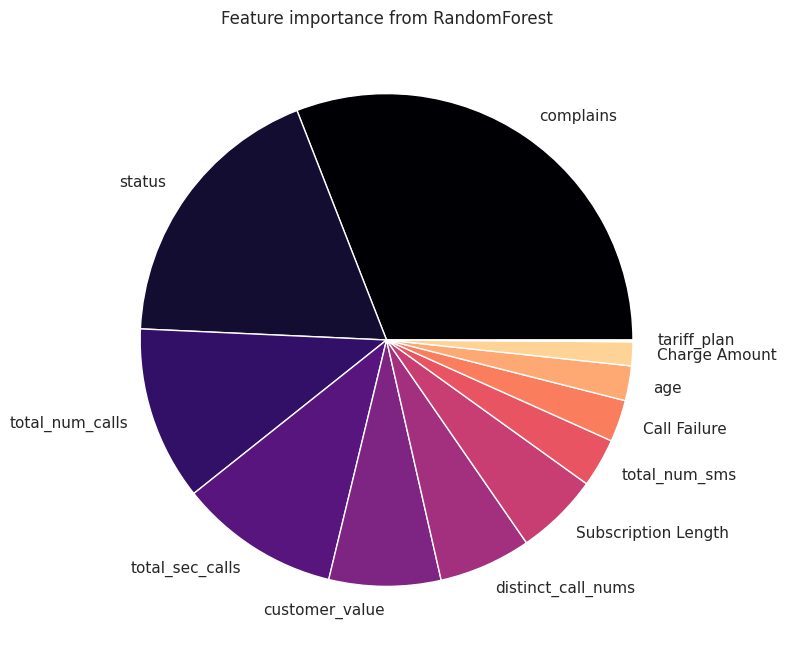

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, max_depth=5)
rf.fit(X_train_normalized_df, y_train)
rf_y_pred = rf.predict(X_test_normalized_df)

pd.Series(rf.feature_importances_, index = X_train_normalized_df.columns).nlargest(15).plot(kind = 'pie',
                                                                               figsize = (8, 8),
                                                                              title = 'Feature importance from RandomForest', colormap='magma');

In [ ]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=500, max_depth=5)
rf.fit(X_train_normalized_df, y_train)

# Get feature importances in numeric form
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_normalized_df.columns,
                                      'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                Feature  Importance
7             complains    0.310303
10               status    0.179358
3       total_num_calls    0.117641
2       total_sec_calls    0.103045
6        customer_value    0.074189
5    distinct_call_nums    0.060671
1   Subscription Length    0.053125
4         total_num_sms    0.030286
0          Call Failure    0.028629
11                  age    0.021075
8         Charge Amount    0.020615
9           tariff_plan    0.001062


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already split and preprocessed your data (X_train_normalized_df, y_train)

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=500, max_depth=5)
rf.fit(X_train_normalized_df, y_train)

# Get feature importances in numeric form
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_normalized_df.columns,
                                      'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)







                Feature  Importance
7             complains    0.307246
10               status    0.189878
3       total_num_calls    0.115489
2       total_sec_calls    0.100237
6        customer_value    0.070041
5    distinct_call_nums    0.061850
1   Subscription Length    0.048535
4         total_num_sms    0.032560
0          Call Failure    0.031471
11                  age    0.023190
8         Charge Amount    0.018317
9           tariff_plan    0.001186


In [ ]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = "\n"
    str_out += ("#####  TEST SCORES  #####\n--------------------")
    str_out += ("\n")

    #print accuracy
    accuracy = accuracy_score(test, pred)
    str_out += ("ACCURACY: {:.4f}\n".format(accuracy))
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")

    #print confusion matrix
    str_out += ("CONFUSION MATRIX:\n--------------------\n")
    conf_mat = confusion_matrix(test, pred)
    str_out += ("{}".format(conf_mat))
    str_out += ("\n")
    str_out += ("\n--------------------\n")

    #print classification report
    str_out += ("{}".format(classification_report(test, pred)))

    false_indexes = np.where(test != pred)
    return str_out, false_indexes

### **Classifier #1: Decision Tree**

In [ ]:
# decision tree with "gini"
dt_1 = DecisionTreeClassifier(random_state = 0, criterion="gini")

# parameters
parameters = {
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                "max_depth": [9, 11, 13, 15, 17, None]
                }

start_time=time.time()##

# grid search for parameters
grid_1 = GridSearchCV(estimator=dt_1, param_grid=parameters, cv=cv, n_jobs=-1)
grid_1.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1.best_params_, grid_1.best_score_))

################################################
# detailed dataframe of gridsearch

#detailed_grid_results = pd.DataFrame(grid.cv_results_)
#detailed_grid_results


################################################

# prediction results
y_pred = grid_1.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv (DT-gini): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'class_weight': None, 'max_depth': 13, 'splitter': 'random'} with a score of 0.9341

Run time for train&test cv (DT-gini):  3.4794390201568604

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9381

AUC: 0.8852

CONFUSION MATRIX:
--------------------
[[511  20]
 [ 19  80]]

--------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       531
           1       0.80      0.81      0.80        99

    accuracy                           0.94       630
   macro avg       0.88      0.89      0.88       630
weighted avg       0.94      0.94      0.94       630



In [ ]:
start_time=time.time()##

# grid search for parameters for hold_out
grid_1_h = GridSearchCV(estimator=dt_1, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_1_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_1_h.best_params_, grid_1_h.best_score_))

#########################################

# prediction results
y_pred = grid_1_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out (DT-gini): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'class_weight': 'balanced', 'max_depth': 15, 'splitter': 'random'} with a score of 0.9444

Run time for train&test hold_out (DT-gini):  0.22530531883239746

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9444

AUC: 0.9260

CONFUSION MATRIX:
--------------------
[[506  25]
 [ 10  89]]

--------------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       531
           1       0.78      0.90      0.84        99

    accuracy                           0.94       630
   macro avg       0.88      0.93      0.90       630
weighted avg       0.95      0.94      0.95       630



## **Classifier #2: Decision Tree**

In [ ]:
# decision tree with "entropy" gain_ratio
dt_2 = DecisionTreeClassifier(random_state = 0, criterion="entropy")

# parameters
parameters = {
                "splitter": ["best","random"],
                "class_weight": [None, "balanced"],
                "max_depth": [11, 13, 15, 17, 19, 21, None]
                }

start_time=time.time()##

# grid search for parameters
grid_2 = GridSearchCV(estimator=dt_2, param_grid=parameters, cv=cv, n_jobs=-1)
grid_2.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_2.best_params_, grid_2.best_score_))

########################################

# prediction results
y_pred = grid_2.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv (DT-gain ratio): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'class_weight': 'balanced', 'max_depth': 21, 'splitter': 'random'} with a score of 0.9357

Run time for train&test cv (DT-gain ratio):  1.2665326595306396

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9508

AUC: 0.9010

CONFUSION MATRIX:
--------------------
[[517  14]
 [ 17  82]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       531
           1       0.85      0.83      0.84        99

    accuracy                           0.95       630
   macro avg       0.91      0.90      0.91       630
weighted avg       0.95      0.95      0.95       630



In [ ]:
start_time=time.time()##

# grid search for parameters for hold_out
grid_2_h = GridSearchCV(estimator=dt_2, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_2_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_2_h.best_params_, grid_2_h.best_score_))

#####################################

# prediction results
y_pred = grid_2_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out (DT-gain ratio): ",end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)


The best parameters are {'class_weight': 'balanced', 'max_depth': 15, 'splitter': 'best'} with a score of 0.9429

Run time for train&test hold_out (DT-gain ratio):  0.26233887672424316

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9159

AUC: 0.8392

CONFUSION MATRIX:
--------------------
[[505  26]
 [ 27  72]]

--------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       531
           1       0.73      0.73      0.73        99

    accuracy                           0.92       630
   macro avg       0.84      0.84      0.84       630
weighted avg       0.92      0.92      0.92       630



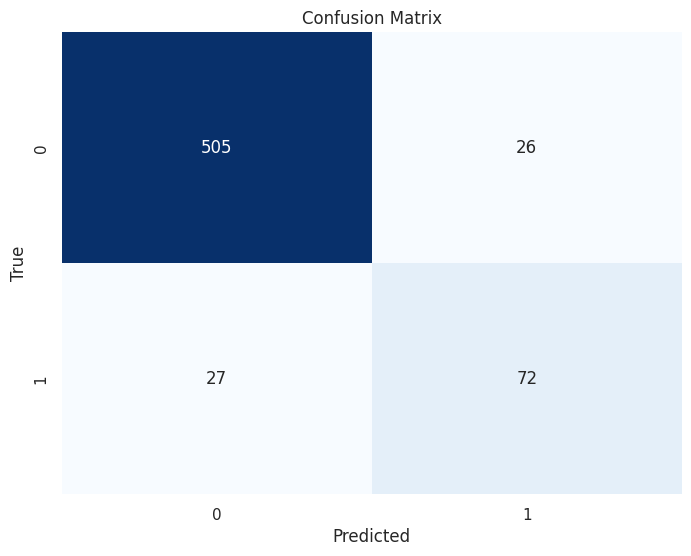

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Classifier #3: Naive Bayes**

In [ ]:
# Naive-Bayes with different approaches
nb_list = [GaussianNB(), MultinomialNB(), ComplementNB()]

for nb in nb_list:
    print("*********", str(nb), "**********")
    # parameters
    parameters = {}

    start_time=time.time()##
    # grid search for parameters
    grid_3 = GridSearchCV(estimator=nb, param_grid=parameters, cv=cv, n_jobs=-1)
    grid_3.fit(X_train_normalized_df, y_train)

    # print best scores
    print("The best parameters are %s with a score of %0.4f\n"
          % (grid_3.best_params_, grid_3.best_score_))

    # prediction results
    y_ord_pred = grid_3.predict(X_test_normalized_df)

    end_time=time.time()##
    print("\nRun time for train&test cv{}: ".format(str(nb)), end_time-start_time)

    # print accuracy metrics
    results, false = display_test_scores(y_test, y_pred)
    print("\n>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<\n")
    print(results)


********* GaussianNB() **********
The best parameters are {} with a score of 0.7619


Run time for train&test cvGaussianNB():  0.0509951114654541

>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9159

AUC: 0.8392

CONFUSION MATRIX:
--------------------
[[505  26]
 [ 27  72]]

--------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       531
           1       0.73      0.73      0.73        99

    accuracy                           0.92       630
   macro avg       0.84      0.84      0.84       630
weighted avg       0.92      0.92      0.92       630

********* MultinomialNB() **********
The best parameters are {} with a score of 0.8968


Run time for train&test cvMultinomialNB():  0.05078554153442383

>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9159

AUC: 0.8392

CONFUS

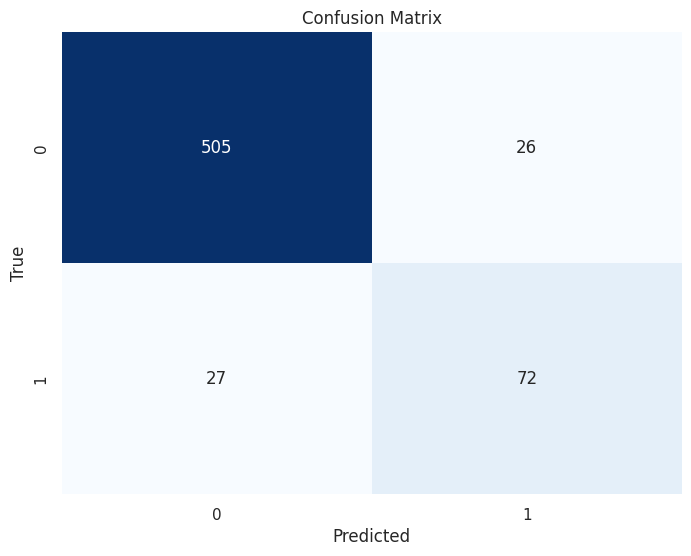

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
for nb in nb_list:
    print("*********", str(nb), "**********")
    # parameters
    parameters = {}

    start_time=time.time()##
    # grid search for parameters
    grid_3_h = GridSearchCV(estimator=nb, param_grid=parameters, cv=hold_out, n_jobs=-1)
    grid_3_h.fit(X_train_normalized_df, y_train)

    # print best scores
    print("The best parameters are %s with a score of %0.4f\n"
          % (grid_3_h.best_params_, grid_3_h.best_score_))

    # prediction results
    y_ord_pred = grid_3_h.predict(X_test_normalized_df)

    end_time=time.time()##
    print("\nRun time for train&test hold_out{}: ".format(str(nb)), end_time-start_time)

    # print accuracy metrics
    results, false = display_test_scores(y_test, y_pred)
    print("\n>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<\n")
    print(results)


********* GaussianNB() **********
The best parameters are {} with a score of 0.7556


Run time for train&test hold_outGaussianNB():  0.020925521850585938

>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9159

AUC: 0.8392

CONFUSION MATRIX:
--------------------
[[505  26]
 [ 27  72]]

--------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       531
           1       0.73      0.73      0.73        99

    accuracy                           0.92       630
   macro avg       0.84      0.84      0.84       630
weighted avg       0.92      0.92      0.92       630

********* MultinomialNB() **********
The best parameters are {} with a score of 0.8921


Run time for train&test hold_outMultinomialNB():  0.021291732788085938

>>>>>>>>><<<<<<<<<<>>>>>>>>>>><<<<<<<<<<<<<>>>>>>>>><<<<<<<<


#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9159

AUC:

## **Classifier #4: ANN - 1 layer**

In [ ]:
# NN with 1 layer
ann_1 = MLPClassifier(tol=1e-5, random_state=0, solver='adam', activation='tanh', max_iter=1000, batch_size=256)

parameters = {
                'hidden_layer_sizes': [(10,),(50,),(100,)],
                'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
            }


start_time=time.time()##
# grid search for parameters
grid_4 = GridSearchCV(estimator=ann_1, param_grid=parameters, cv=cv, n_jobs=-1)
grid_4.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_4.best_params_, grid_4.best_score_))

###################################

# prediction results
y_pred = grid_4.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv NN-1 layer: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'alpha': 0.0001, 'hidden_layer_sizes': (50,)} with a score of 0.9175


Run time for train&test cv NN-1 layer:  629.264139175415

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9381

AUC: 0.8564

CONFUSION MATRIX:
--------------------
[[518  13]
 [ 26  73]]

--------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.85      0.74      0.79        99

    accuracy                           0.94       630
   macro avg       0.90      0.86      0.88       630
weighted avg       0.94      0.94      0.94       630



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
start_time=time.time()##

# grid search for parameters for hold_out
grid_4_h = GridSearchCV(estimator=ann_1, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_4_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_4_h.best_params_, grid_4_h.best_score_))

####################################

# prediction results
y_pred = grid_4_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out NN-1 layer: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'alpha': 0.0001, 'hidden_layer_sizes': (100,)} with a score of 0.9206

Run time for train&test hold_out NN-1 layer:  130.4900758266449

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9381

AUC: 0.8564

CONFUSION MATRIX:
--------------------
[[518  13]
 [ 26  73]]

--------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       531
           1       0.85      0.74      0.79        99

    accuracy                           0.94       630
   macro avg       0.90      0.86      0.88       630
weighted avg       0.94      0.94      0.94       630



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# Classifier #5: ANN - 2 layer

In [ ]:
# NN with 2 layers
nn_2 = MLPClassifier(tol=1e-5, random_state=0, solver='adam', activation='tanh', max_iter=1000, batch_size=256)


parameters = {
                'hidden_layer_sizes': [(10, 10),(50, 50),(100, 100)],
                'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
            }

start_time=time.time()##
# grid search for parameters
grid_5 = GridSearchCV(estimator=nn_2, param_grid=parameters, cv=cv, n_jobs=-1)
grid_5.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_5.best_params_, grid_5.best_score_))

############################

# prediction results
y_pred = grid_5.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test cv NN-2 layer: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'alpha': 0.001, 'hidden_layer_sizes': (50, 50)} with a score of 0.9381


Run time for train&test cv NN-2 layer:  775.3169932365417

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9556

AUC: 0.9161

CONFUSION MATRIX:
--------------------
[[517  14]
 [ 14  85]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       531
           1       0.86      0.86      0.86        99

    accuracy                           0.96       630
   macro avg       0.92      0.92      0.92       630
weighted avg       0.96      0.96      0.96       630



In [ ]:
start_time=time.time()##

# grid search for parameters for hold_out
grid_5_h = GridSearchCV(estimator=nn_2, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_5_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f"
      % (grid_5_h.best_params_, grid_5_h.best_score_))

####################################

# prediction results
y_pred = grid_5_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out NN-2 layer: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'alpha': 0.001, 'hidden_layer_sizes': (100, 100)} with a score of 0.9476

Run time for train&test hold_out NN-2 layer:  162.71217012405396

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9508

AUC: 0.9092

CONFUSION MATRIX:
--------------------
[[515  16]
 [ 15  84]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       531
           1       0.84      0.85      0.84        99

    accuracy                           0.95       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.95      0.95      0.95       630



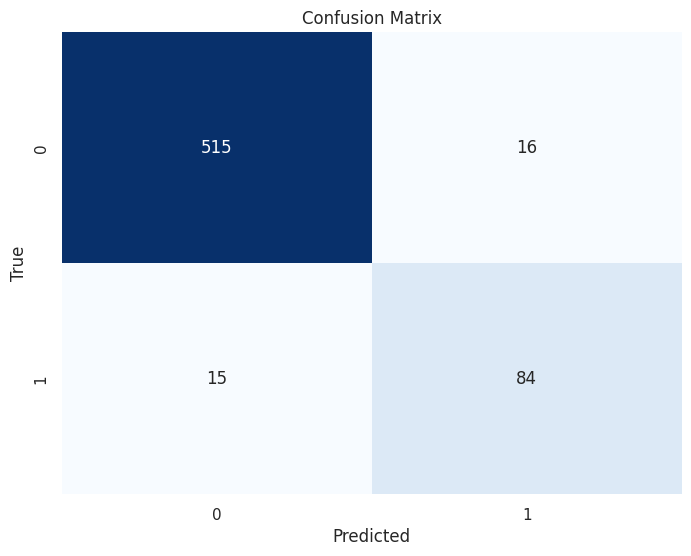

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Classifier #6: **SVM**


In [ ]:
# SVM classifier
svm = SVC(tol=1e-5)

# parameters
parameters = {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 300, 800, 1000, 1200],
                'class_weight': [None, 'balanced']
            }

start_time=time.time()##

# grid search for parameters
grid_6 = GridSearchCV(estimator=svm, param_grid=parameters, cv=cv, n_jobs=-1)
grid_6.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_6.best_params_, grid_6.best_score_))

# prediction results
y_pred = grid_6.predict(X_test_normalized_df)


end_time=time.time()##
print("\nRun time for train&test cv SVM : ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'C': 100, 'class_weight': None, 'kernel': 'rbf', 'max_iter': 1200} with a score of 0.9429


Run time for train&test cv SVM :  125.27787208557129

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9556

AUC: 0.9120

CONFUSION MATRIX:
--------------------
[[518  13]
 [ 15  84]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       531
           1       0.87      0.85      0.86        99

    accuracy                           0.96       630
   macro avg       0.92      0.91      0.92       630
weighted avg       0.96      0.96      0.96       630



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
start_time=time.time()##

# grid search for parameters
grid_6_h = GridSearchCV(estimator=svm, param_grid=parameters, cv=hold_out, n_jobs=-1)
grid_6_h.fit(X_train_normalized_df, y_train)

# print best scores
print("The best parameters are %s with a score of %0.4f\n"
      % (grid_6_h.best_params_, grid_6_h.best_score_))

# prediction results
y_pred = grid_6_h.predict(X_test_normalized_df)

end_time=time.time()##
print("\nRun time for train&test hold_out SVM : ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_test, y_pred)
print(results)

The best parameters are {'C': 100, 'class_weight': None, 'kernel': 'rbf', 'max_iter': 1000} with a score of 0.9429


Run time for train&test hold_out SVM :  22.21468186378479

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9492

AUC: 0.9041

CONFUSION MATRIX:
--------------------
[[515  16]
 [ 16  83]]

--------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       531
           1       0.84      0.84      0.84        99

    accuracy                           0.95       630
   macro avg       0.90      0.90      0.90       630
weighted avg       0.95      0.95      0.95       630



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# Classifier #7: Bagging

In [ ]:
start_time=time.time()##

#generate subsamples by indices
indexes=X_train.index.values
rep = np.array([np.random.choice(indexes, len(indexes), replace = True) for _ in range(6)])

#rep_x_train has 6 dfs
rep_x_train=[df.iloc[arr,:-1] for arr in rep]
rep_y_train=[df.iloc[arr,-1] for arr in rep]

#dfs are created by bootstrapping
rep_x_train[0].duplicated()
rep_y_train[0].duplicated()

865     False
1567     True
2076    False
247      True
2116     True
        ...  
1886     True
2610     True
862      True
904      True
2984     True
Name: Churn, Length: 2520, dtype: bool

In [ ]:
indexes

array([2402, 1644,  732, ..., 2853,  504,  486])

In [ ]:
rep

array([[ 865, 1567, 2076, ...,  862,  904, 2984],
       [2852, 2825, 3001, ...,  893,  504, 1216],
       [2051,  187, 1877, ..., 3065, 1172, 1668],
       [1069, 2509, 1309, ..., 1555,  249, 2777],
       [2204,  461,  864, ..., 3123, 1851, 2963],
       [2827, 1905, 2020, ..., 1050, 1046, 2610]])

In [ ]:
preds=[]

#dt_1 --> cv
model_1 = grid_1.best_estimator_
model_1.fit(rep_x_train[0], rep_y_train[0])

pred_1=model_1.predict(X_test)
preds.append(pred_1)

#####################################

#dt_2 --> cv
model_2 = grid_2.best_estimator_
model_2.fit(rep_x_train[1], rep_y_train[1])

pred_2=model_2.predict(X_test)
preds.append(pred_2)

#####################################

#nb --> cv
model_3 = grid_3.best_estimator_
model_3.fit(rep_x_train[2], rep_y_train[2])

pred_3=model_3.predict(X_test)
preds.append(pred_3)

###################################

#ann_1 --> cv
model_4 = grid_4.best_estimator_
model_4.fit(rep_x_train[3], rep_y_train[3])

pred_4=model_4.predict(X_test)
preds.append(pred_4)

###################################

#ann_2 --> cv
model_5 = grid_5.best_estimator_
model_5.fit(rep_x_train[4], rep_y_train[4])

pred_5=model_5.predict(X_test)
preds.append(pred_5)


###################################

#svm --> hold
model_6 = grid_6_h.best_estimator_
model_6.fit(rep_x_train[5], rep_y_train[5])

pred_6=model_6.predict(X_test)
preds.append(pred_6)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
arr_preds=np.array(preds)
arr_preds_mean=arr_preds.mean(axis=0)

end_time=time.time()##
print("\nRun time for train&test bagging: ", end_time-start_time)

#see it has same len with X_test
print(len(arr_preds_mean))

# print accuracy metrics
results, false = display_test_scores(y_test, arr_preds_mean.round())
print(results)


Run time for train&test bagging:  10.325066566467285
630

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9095

AUC: 0.7532

CONFUSION MATRIX:
--------------------
[[521  10]
 [ 47  52]]

--------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       531
           1       0.84      0.53      0.65        99

    accuracy                           0.91       630
   macro avg       0.88      0.75      0.80       630
weighted avg       0.90      0.91      0.90       630



### **Classifier #8: Boosting**

In [ ]:
def boosting_step(grid, initial_weight, X_train, y_train):

    # Initialize the weights of each sample with wi = 1/N and
    #create a dataframe in which the evaluation is computed
    df_eval = pd.DataFrame(y_train, columns=["target"])
    df_eval['weights'] = initial_weight


    model = grid.best_estimator_
    model.fit(X_train, y_train, sample_weight=np.array(df_eval['weights']))
    pred=model.predict(X_train)
    score = model.score(X_train,y_train)

    #add values to the df_eval
    df_eval['predictions'] = pred
    df_eval['evaluation'] = np.where(df_eval['predictions'] == df_eval['target'], 1, 0)
    df_eval['misclassified'] = np.where(df_eval['predictions'] != df_eval['target'], 1, 0)

    #cal the misclassification rate and accuracy
    accuracy = sum(df_eval['evaluation']) / len(df_eval['evaluation'])
    misclassification = sum(df_eval['misclassified']) / len(df_eval['misclassified'])


    #cal the error
    err = np.sum(df_eval['weights'] * df_eval['misclassified']) / np.sum(df_eval['weights'])


    #cal the alpha values
    alpha = np.log((1-err) / err)


    # Update the weights wi --> These updated weights are used in the sample_weight parameter
    # for the training of the next decision stump.
    df_eval['weights'] *= np.exp(alpha * df_eval['misclassified'])

    prediction = alpha * df_eval["predictions"]

    return prediction, df_eval['weights']

In [ ]:
#Set the initial weights w = 1/N
start_time=time.time()##

pred_1, w_1=boosting_step(grid_1, 1/len(y_train), X_train, y_train)

pred_2, w_2=boosting_step(grid_2, w_1, X_train, y_train)

pred_3, w_3=boosting_step(grid_3, w_2, X_train, y_train)

#alpha_4, w_4=boosting_step(grid_4, w_3, X_train, y_train)

#alpha_5, w_5=boosting_step(grid_5, w_4, X_train, y_train)

pred_6, w_6=boosting_step(grid_6_h, w_3, X_train, y_train)

pred_final=(pred_1+pred_2+pred_3+pred_6) / 4

pred_final=np.where(pred_final >=0.5, 1, 0)


end_time=time.time()##
print("\nRun time for train&test boosting: ", end_time-start_time)

# print accuracy metrics
results, false = display_test_scores(y_train, pred_final)
print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Run time for train&test boosting:  0.5153172016143799

#####  TEST SCORES  #####
--------------------
ACCURACY: 0.9698

AUC: 0.9821

CONFUSION MATRIX:
--------------------
[[2048   76]
 [   0  396]]

--------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2124
           1       0.84      1.00      0.91       396

    accuracy                           0.97      2520
   macro avg       0.92      0.98      0.95      2520
weighted avg       0.97      0.97      0.97      2520



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time

def evaluate_classifier(y_true, y_pred, classifier_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print("Metrics for", classifier_name)
    print("-------------------------------")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC:", auc)
    print("Confusion Matrix:")
    print(cm)
    print("-------------------------------\n")

# Assuming you have the following classifiers: grid_1, grid_2, grid_3, grid_4_h, grid_5_h, grid_6_h
classifiers = [grid_1, grid_2, grid_3, grid_4_h, grid_5_h, grid_6_h]
classifier_names = ["Decision Tree", "Decision Tree (Entropy)", "Naive Bayes (Gaussian)", "Neural Network (1 layer)",
                    "Neural Network (2 layers)", "SVM"]

X_train = X_train_normalized_df  # Replace with your normalized training data
y_train = y_train  # Replace with your target labels

start_time = time.time()

for i, classifier in enumerate(classifiers):
    classifier_name = classifier_names[i]

    y_pred = classifier.predict(X_train)
    evaluate_classifier(y_train, y_pred, classifier_name)

end_time = time.time()
print("Total run time:", end_time - start_time)

Metrics for Decision Tree
-------------------------------
Accuracy: 0.8896825396825396
Precision: 0.8206521739130435
Recall: 0.3813131313131313
F1-Score: 0.5206896551724138
AUC: 0.6828882040746448
Confusion Matrix:
[[2091   33]
 [ 245  151]]
-------------------------------

Metrics for Decision Tree (Entropy)
-------------------------------
Accuracy: 0.8896825396825396
Precision: 0.8206521739130435
Recall: 0.3813131313131313
F1-Score: 0.5206896551724138
AUC: 0.6828882040746448
Confusion Matrix:
[[2091   33]
 [ 245  151]]
-------------------------------

Metrics for Naive Bayes (Gaussian)
-------------------------------
Accuracy: 0.15714285714285714
Precision: 0.15714285714285714
Recall: 1.0
F1-Score: 0.271604938271605
AUC: 0.5
Confusion Matrix:
[[   0 2124]
 [   0  396]]
-------------------------------

Metrics for Neural Network (1 layer)
-------------------------------
Accuracy: 0.9424603174603174
Precision: 0.861671469740634
Recall: 0.7550505050505051
F1-Score: 0.8048452220726784
AU

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
